In [208]:
import os

import pandas as pd
import numpy as np

import statsmodels.api as sm

%matplotlib inline
from matplotlib import pyplot as plt
plt.ion()

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
dataset_path = "/Users/lixiii/computing/machine_learning/time-series/M4-dataset"

In [4]:
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Weekly-train.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Daily-train.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Hourly-train.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Monthly-test.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Hourly-test.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Weekly-test.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Monthly-train.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Quarterly-test.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Daily-test.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/m4_info.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Yearly-test.csv
/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Yearly-train.csv
/Users/lixiii/computing/machine_lear

In [158]:
md = pd.read_csv("/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Monthly-train.csv")
print(md.shape)
md.head()

(48000, 2795)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2786,V2787,V2788,V2789,V2790,V2791,V2792,V2793,V2794,V2795
0,M1,8000.0,8350.0,8570.0,7700.0,7080.0,6520.0,6070.0,6650.0,6830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M2,2440.0,2490.0,2710.0,2290.0,1960.0,1990.0,1960.0,2530.0,2640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M3,2670.0,2590.0,2784.0,2816.0,2888.0,2906.0,2839.0,2860.0,2798.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M4,7264.0,7215.0,7022.0,7040.0,6966.0,6984.0,7025.0,7082.0,6956.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M5,4210.0,4290.0,4250.0,4320.0,4320.0,4330.0,4320.0,4260.0,4220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
mt = pd.read_csv("/Users/lixiii/computing/machine_learning/time-series/M4-dataset/Monthly-test.csv") # monthly test data
print(mt.shape)

(48000, 19)


In [6]:
info = pd.read_csv("/Users/lixiii/computing/machine_learning/time-series/M4-dataset/m4_info.csv")
info

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00
2,Y3,Macro,1,6,Yearly,01-01-79 12:00
3,Y4,Macro,1,6,Yearly,01-01-79 12:00
4,Y5,Macro,1,6,Yearly,01-01-79 12:00
...,...,...,...,...,...,...
99995,H410,Other,24,48,Hourly,01-01-17 12:00
99996,H411,Other,24,48,Hourly,01-01-17 12:00
99997,H412,Other,24,48,Hourly,01-01-17 12:00
99998,H413,Other,24,48,Hourly,12-06-17 12:00


In [87]:
info[info["M4id"]=="M32"]

,M4id,category,Frequency,Horizon,SP,StartingDate
47031,M32,Macro,12,18,Monthly,01-01-85 12:00


In [8]:
info.describe()

,Frequency,Horizon
count,100000.000000,100000.000000
mean,7.095220,12.777170
std,5.027783,5.859561
min,1.000000,6.000000
25%,1.000000,8.000000
50%,4.000000,14.000000
75%,12.000000,18.000000
max,24.000000,48.000000


In [9]:
md.describe()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,4842.593755,4778.890534,4754.743038,4754.426734,4765.571649,4797.912534,4729.037767,4743.689092,4804.988719,4824.314239,4859.188194,4894.751383,4887.089595,4843.166640,4827.380727,4797.946644,4869.120566,4832.631861
std,3818.918539,3803.274104,3818.283386,3862.261911,3858.656729,3990.959931,3865.840084,3876.647122,4020.178330,3967.897294,4029.513436,4133.095147,4056.904301,4099.576644,4096.783617,4100.150213,4176.802415,4203.798094
min,98.000000,63.657000,62.100000,33.070700,60.990000,48.079400,30.293860,30.956870,25.735169,28.987370,36.040000,20.653000,80.000000,61.900000,56.100000,45.800000,30.700000,24.500000
25%,1877.352500,1840.000000,1810.000000,1800.000000,1800.000000,1801.675000,1780.000000,1785.570328,1800.000000,1809.817500,1835.817500,1846.070000,1844.151000,1806.000000,1791.708641,1769.236250,1790.875000,1759.015000
50%,3691.701050,3600.794500,3580.000000,3536.325080,3550.000000,3555.623000,3510.000000,3520.000000,3568.066090,3590.000000,3610.000000,3640.000000,3609.000000,3550.000000,3508.432000,3490.000000,3523.723000,3470.000000
75%,6945.296295,6855.000000,6800.000000,6822.136173,6869.018900,6900.000000,6800.000000,6802.725500,6871.154000,6900.000000,6920.000000,6994.711165,6978.311250,6910.000000,6900.000000,6850.207500,6987.072500,6900.000000
max,53409.000000,82500.000000,52602.000000,60278.300000,58900.000000,171562.400000,55161.000000,53767.000000,150000.000000,65704.000000,87200.000000,177950.000000,75000.000000,87200.000000,76421.000000,100100.000000,75406.000000,76653.000000


In [159]:
@interact(id=(0,50))
def vis(id):
    md.loc[id][1:].plot()
    plt.title(f"id: {md.loc[id][0]}")

interactive(children=(IntSlider(value=25, description='id', max=50), Output()), _dom_classes=('widget-interact…

## Pick single series

M1


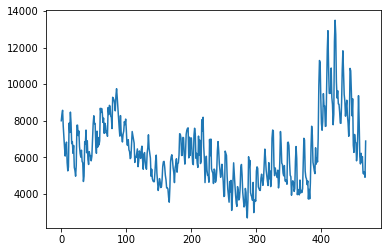

In [469]:
# idx=35
idx=0
s=md.loc[idx][1:].dropna().to_numpy()
M4id = md.loc[idx][0]
print(M4id)
plt.plot(s)

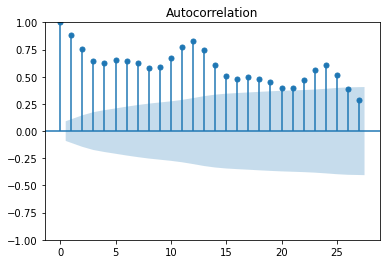

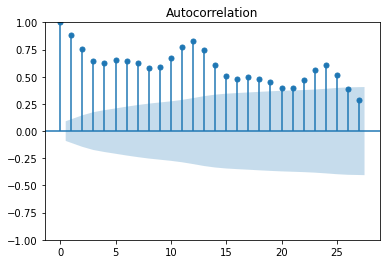

In [470]:
plot_acf(s)

In [471]:
@interact(lag=(1,5))
def plot_dif(lag):
    diff = []
    for i in range(lag, len(s)):
        diff.append(s[i] - s[i-lag])
    plt.plot(diff)
    plt.title(f"differenced series with lag {lag}")

interactive(children=(IntSlider(value=3, description='lag', max=5, min=1), Output()), _dom_classes=('widget-in…

## Simple ES Model

In [472]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

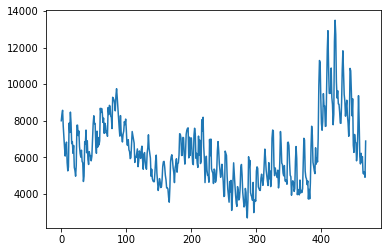

In [473]:
s = s.astype(float)
plt.plot(s)

In [503]:
# model = ExponentialSmoothing(s[:-1])
# model = ExponentialSmoothing(s[:-1], trend="additive", seasonal="additive", seasonal_periods=12)
model = ExponentialSmoothing(s[:-1], trend="add", damped_trend=True, seasonal="add", seasonal_periods=12)
model.initialize()

In [504]:
fmodel = model.fit()
fmodel.params

{'smoothing_level': 0.42928571428571427,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.2445918367346939,
 'damping_trend': 0.99,
 'initial_level': 6829.999999999996,
 'initial_trend': -13.295454545454078,
 'initial_seasons': array([  838.03819444,   893.35069444,  1323.03819444,   809.07986111,
          450.01736111,  -189.67013889,  -543.21180556,    -4.25347222,
         -453.10763889,  -798.94097222, -1323.42013889, -1000.92013889]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

(469,)


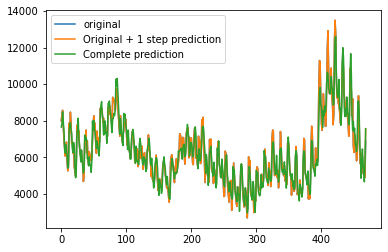

In [505]:
# %matplotlib
p = model.predict(model.params)
plt.plot(s, label="original")
p_1step = np.concatenate([s[:-1],p])
plt.plot(p_1step, label="Original + 1 step prediction")
p_complete = model.predict(model.params,0,len(s)-1)
plt.plot(p_complete, label="Complete prediction")
plt.legend()

print(p_complete.shape)


In [362]:
%matplotlib inline

## GBM Regressor

Clearly does **not** work for univariate time series

In [375]:
from sklearn.ensemble import GradientBoostingRegressor

In [376]:
model2 = GradientBoostingRegressor()

In [381]:
X = np.arange(len(s)).reshape(-1,1)

In [386]:
model2.fit(X,s)

GradientBoostingRegressor()

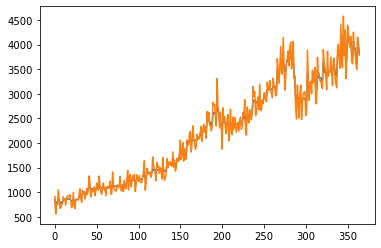

In [388]:
plt.plot(model2.predict(X))
plt.plot(s)

In [396]:
model2.predict(np.arange(len(s),len(s)+h-1).reshape(-1,1))

array([3817.86753463, 3817.86753463, 3817.86753463, 3817.86753463,
       3817.86753463, 3817.86753463, 3817.86753463, 3817.86753463,
       3817.86753463, 3817.86753463, 3817.86753463, 3817.86753463,
       3817.86753463, 3817.86753463, 3817.86753463, 3817.86753463,
       3817.86753463])

## Evaluation

In [497]:
def sMAPE(y, predicted): # returns number in percentage
    assert len(y) == len(predicted)
    r = 0
    for i in range(len(y)):
        r += 100*abs(y[i]-predicted[i])/(abs(y[i]) + abs(predicted[i]))
    return r*2/len(y)

In [498]:
h = int(info[info["M4id"]==M4id]["Horizon"])

In [499]:
st = mt[mt["V1"]==M4id]
st

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,M1,8720.0,7790.0,4770.0,5060.0,4720.0,4450.0,5120.0,5960.0,6560.0,4900.0,4520.0,7370.0,9050.0,7780.0,5380.0,4700.0,4490.0,4010.0


In [506]:
y_test = st.to_numpy().flatten()[1:].astype(float)
y_test

array([8720., 7790., 4770., 5060., 4720., 4450., 5120., 5960., 6560.,
       4900., 4520., 7370., 9050., 7780., 5380., 4700., 4490., 4010.])

In [507]:
p=model.predict(model.params,len(s)-1, len(s)-1+h-1)
sMAPE(y_test, p)

19.32837874220818

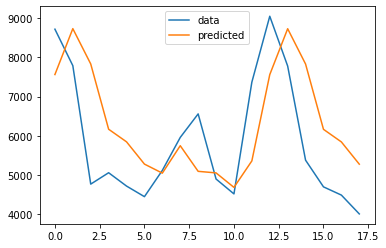

In [508]:
plt.plot(y_test,label="data")
plt.plot(p,label="predicted")
plt.legend()

### Comparison with Simple benchmarks

In [509]:
naive1 = [s[-1]]*h
naive2 = [s[len(s) - 12 + (i%12)] for i in range(1,h+1)]

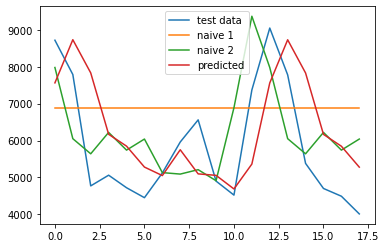

In [510]:
plt.plot(y_test,label="test data")
plt.plot(naive1,label="naive 1")
plt.plot(naive2,label="naive 2")
plt.plot(p,label="predicted")
plt.legend()

In [511]:
print(f"sMAPE for naive1: {sMAPE(y_test,naive1)}")
print(f"sMAPE for naive2: {sMAPE(y_test,naive2)}")
print(f"sMAPE for model: {sMAPE(y_test,p)}")

sMAPE for naive1: 28.370349118011386
sMAPE for naive2: 20.033697460285254
sMAPE for model: 19.32837874220818


# Automation

In [426]:
def sMAPE(y, predicted): # returns number in percentage
    assert len(y) == len(predicted)
    r = 0
    for i in range(len(y)):
        r += 100*abs(y[i]-predicted[i])/(abs(y[i]) + abs(predicted[i]))
    return r*2/len(y)

In [466]:
from abc import ABC, abstractmethod
class UnifiedModel(ABC):
    def __init__(self):
        pass 
    
    @abstractmethod
    def fit(self,y):
        pass 
    
    @abstractmethod
    def predict_horizon(self,h:int):
        pass
    
    def evaluate(self, y, horizon:int):
        return sMAPE(y, self.predict_horizon(horizon))
    

class Naive1(UnifiedModel):
    def fit(self, y):
        self.value = y[-1]
        
    def predict_horizon(self, h):
        return np.array( [self.value]*h )
        

class Naive2(UnifiedModel):
    '''Seasonal naive (default for monthly data)'''
    def fit(self, y, seasonal_periods:int=12):
        self.seasonal_periods = seasonal_periods
        self.values = y[-seasonal_periods:]
        
    def predict_horizon(self, h):
        s = self.values
        p = self.seasonal_periods
        return [s[len(s) - p + (i%p)] for i in range(1,h+1)]
    
class ES(UnifiedModel):
    """Exponential Smoothing"""
    def fit(self, y):
        self.prediction_start_idx = len(y)-1
        self.model = ExponentialSmoothing(y, trend="add", damped_trend=False, seasonal="add", seasonal_periods=12)
        self.model.fit()
    
    def predict_horizon(self,h):
        return self.model.predict(self.model.params, self.prediction_start_idx, self.prediction_start_idx+h-1)

In [447]:
# required global vars: 
# md: m4 training data
# mt: m4 test data 
# info: m4 dataset info df
def evaluate_model(Model, series_id):
    M4id = md.loc[series_id][0]
    horizon = int(info[info["M4id"]==M4id]["Horizon"])
    y_train=md.loc[series_id][1:].dropna().to_numpy().astype(float)
    y_test = mt[mt["V1"]==M4id].to_numpy().flatten()[1:].astype(float)
    m = Model()
    m.fit(y_train)
    
    return m.evaluate(y_test,horizon)

In [451]:
evaluate_model(Naive2,35)

10.47419885754074

In [459]:
n1_results = [evaluate_model(Naive1,i) for i in range(100)]
n2_results = [evaluate_model(Naive2,i) for i in range(100)]

In [460]:
np.average(n1_results)

11.028481980909834

In [461]:
np.average(n2_results)

10.984019836564663

In [464]:
es_results = [evaluate_model(ES,i) for i in range(100)]

/Users/lixiii/anaconda3/envs/time/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/lixiii/anaconda3/envs/time/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/lixiii/anaconda3/envs/time/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/lixiii/anaconda3/envs/time/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/lixiii/anaconda3/envs/time/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/lix

In [465]:
np.average(es_results)

11.229244526124178

In [468]:
evaluate_model(ES,0)

/Users/lixiii/anaconda3/envs/time/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


18.45633168244363

(array([45., 29., 12.,  6.,  5.,  0.,  0.,  1.,  0.,  2.]),
 array([ 0.48191015,  7.03338265, 13.58485516, 20.13632766, 26.68780016,
        33.23927267, 39.79074517, 46.34221767, 52.89369018, 59.44516268,
        65.99663519]),
 <BarContainer object of 10 artists>)

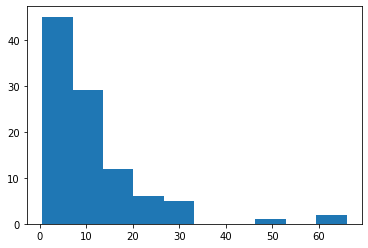

In [513]:
plt.hist(es_results)